# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11493376/11490434 [==============================] - 0s 0us/step


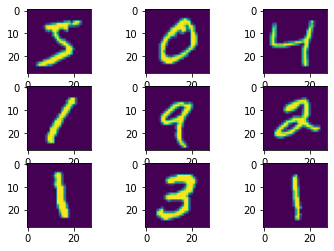

(55000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# Converts a class vector (integers) to one-hot encoding matrix.
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# get validation dataset
# then we need to get the validation dataset. We take 5 thoudsands images randomly from the training data, as the validation data
np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

X_train.shape

## Build and train the model

Build and train your model. 


In [ ]:
# TODO: Build your model

# A grid search was implemented in order to find the optimal hyperparameters of the ANN.
# After obtaining the optimal parameters, the grid search code was commented out

# Implementing a function which builds a keras model, depending on the provided parameters
# def build_model(n_hidden=2, n_neurons=64, dropout_rate=0.2, learning_rate=1e-4, input_shape=[28, 28]):
#   model = keras.models.Sequential()
#   model.add(keras.layers.Flatten(input_shape=input_shape))
#   model.add(keras.layers.Dropout(rate=dropout_rate))
#   for layer in range(n_hidden):
#     model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal"))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(rate=dropout_rate))
#   model.add(keras.layers.Dense(10, activation="softmax"))
#   optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#   model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#   return model

# Transfer the keras model to a scikit-learn regressor so we can utilise the helper functions provided by scikit-learn
# keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# from sklearn.model_selection import GridSearchCV

# Defining the grid with hyperparameters to search from
# param_distributions = {
#     "n_hidden": [2, 3],
#     "n_neurons": [64, 128, 256, 512],
#     "dropout_rate": [0.2, 0.5],
#     "learning_rate": [1e-4, 1e-3, 1e-2],
# }

# Training models with various combinations of hyperparameters
# grid_search_cv = GridSearchCV(estimator=keras_class,
#                               param_grid=param_distributions,
#                               cv=3)
# grid_search_cv.fit(X_train_full, y_train_full, epochs=5)

# Printing out the best combination of hyperparameters (with regards to cross-validation accuracy)
# print(grid_search_cv.best_params_)

# Creating the keras model with the optimal hyperparameters according to the results
# of the grid search
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])
# Implementing early stopping in order to prevent overfitting and using as many
# epochs as necessary
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4714 - accuracy: 0.8576 - val_loss: 0.1200 - val_accuracy: 0.9632
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1838 - accuracy: 0.9430 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1559 - accuracy: 0.9507 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1300 - accuracy: 0.9588 - val_loss: 0.0819 - val_accuracy: 0.9734
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1179 - accuracy: 0.9627 - val_loss: 0.0759 - val_accuracy: 0.9772
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1057 - accuracy: 0.9661 - val_loss: 0.0807 - val_accuracy: 0.9794
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0968 - accuracy: 0.9695 - val_loss: 0.0654 - val_ac

In [ ]:
# show the structure of your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)              

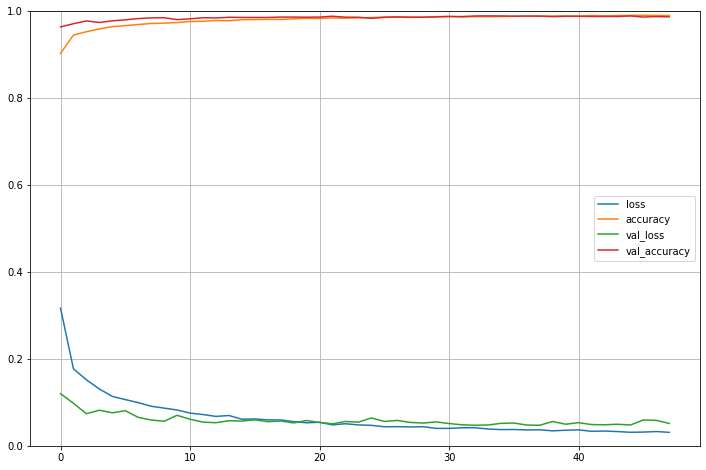

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [ ]:
model.save('mnist.h5') 

## Load the model and evaluate it on the test data

In [ ]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.9872


[0.04479704797267914, 0.9872000217437744]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

In order to find good hyperparameters (with regards to cross-validation accuracy) for our ANN, we make use of an extensive grid search. The grid search took about one hour, using Colab's GPU.

To limit the scope of the grid search, we decided to test only 2 or 3 hidden layers. In addition, we tested different constant number of neuros per layer (up to 512). With this number of hidden layers and neurons per layer, the model should be complex enough and should not have high bias. To prevent from overfitting, we implemented dropout regularisation, with varying degrees of dropout rate.

The model with the best parameters according to our grid search has 2 hidden layers with 512 neurons each. The dropout rate is set to 0.2. To limit the problem of vanishing/exploding gradients, we use ReLU activation functions for the hidden layers, with a corresponding He initialisation of the weights. To that end, batch normalisation after the activation functions is also utilized.

Although our model is not so deep, we still decided to use batch normalisation. Because the model is not so complex, it does not considerably slow down the training process.

We use the Adam optimiser instead of SGD, as it requires less steps to converge. We tested batch sizes of 32, 64 and 128. Although training was much faster with a batch size of 128, the achieved accuracy was lower (around 0.9850 on test set) than with a batch size of 32 (around 0.9872 on test set). Therefore we chose a batch size of 32 for our final model.

The reason for testing hyperparameters as powers of 2 (batch size, number of nodes per layer) is simply due to convention.

We chose the number of epochs to be 100 and implemented early stopping, in order to find parameters which are not overfitting.

The most difficult decision we had to make was at the beginning, when we had to decide how many hidden layers the model should have. We tried out hidden layers of 1, 2 and 5 with different numbers of neurons. After getting more familiar with the complexity of the underlying problem, we simply decided to go for a grid search, as we had access to Colab's GPU, which significantly decreased run-time.

With the help of this practical we learned how to implement grid search for finding the optimal parameters of an Artificial Neural Network. We also understood better the relationship between number of nodes, number of layers and regularisation (dropout rate).

The practical was mainly completed by Vladimir, however Fabian provided valuable insights during the implementation. The results have also been discussed with Fabian.